In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('data/train.csv')
df.shape
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,DRIRC89L0T,18,137576,209136,846,26,2,10.47,60,0.81,High School,Self-employed,Single,Yes,No,Business,No,0
1,TS0FIUNHNU,47,57194,5970,748,30,2,19.72,36,0.73,High School,Unemployed,Divorced,No,Yes,Education,No,0
2,I0YR284A1V,26,84328,95065,453,7,2,24.25,12,0.45,Master's,Self-employed,Married,No,No,Other,Yes,0
3,WB1T7NQV8A,53,49795,229582,533,107,3,14.44,60,0.17,Bachelor's,Self-employed,Single,Yes,No,Auto,Yes,1
4,J6GU9M4G1Z,49,115450,22072,840,0,4,24.48,12,0.11,Bachelor's,Part-time,Single,No,Yes,Education,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204272,KYS1HKNGGE,40,116623,161673,651,79,2,23.44,12,0.87,Bachelor's,Part-time,Divorced,No,No,Home,Yes,0
204273,5MAOH3AOZO,67,62958,189499,460,77,3,9.29,36,0.11,Bachelor's,Self-employed,Single,No,No,Business,Yes,0
204274,5Y9Z6NW29X,62,34372,59645,524,94,3,9.72,60,0.24,PhD,Full-time,Single,Yes,No,Auto,No,0
204275,O51974F566,44,146262,198454,489,7,4,4.31,48,0.30,High School,Self-employed,Married,Yes,No,Home,No,0


In [3]:
#drop duplicates
df.drop_duplicates(inplace=True)
df.shape

(204277, 18)

In [4]:
#drop columns with more than 50% null values
null_value_percentage=(df.isna().sum()/df.shape[0])*100
null_value_percentage

LoanID            0.0
Age               0.0
Income            0.0
LoanAmount        0.0
CreditScore       0.0
MonthsEmployed    0.0
NumCreditLines    0.0
InterestRate      0.0
LoanTerm          0.0
DTIRatio          0.0
Education         0.0
EmploymentType    0.0
MaritalStatus     0.0
HasMortgage       0.0
HasDependents     0.0
LoanPurpose       0.0
HasCoSigner       0.0
Default           0.0
dtype: float64

In [5]:
#outlier detection and removal
numerical_cols=df.select_dtypes(include=['float64','int64']).columns
summary_stats=df[numerical_cols].describe()
summary_stats

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000
mean,43.489340,82506.227980,127547.496395,574.075500,59.508511,2.502078,13.488147,36.010926,0.500579,0.116278
std,14.995191,38952.103374,70855.064746,158.877098,34.645589,1.116898,6.636060,16.944827,0.230914,0.320559
min,18.000000,15000.000000,5001.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48878.000000,66059.000000,437.000000,30.000000,2.000000,7.760000,24.000000,0.300000,0.000000
50%,43.000000,82400.000000,127603.000000,574.000000,59.000000,3.000000,13.450000,36.000000,0.500000,0.000000
75%,56.000000,116247.000000,188843.000000,712.000000,90.000000,4.000000,19.240000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


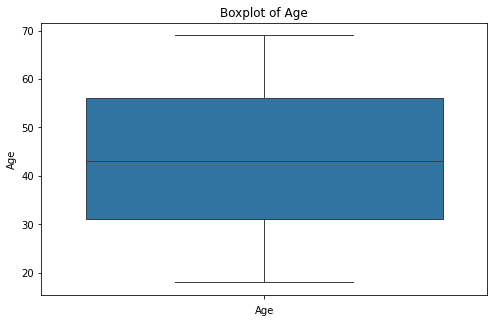

In [6]:
#plot Age
plt.figure(figsize=(8, 5))
sns.boxplot(df['Age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

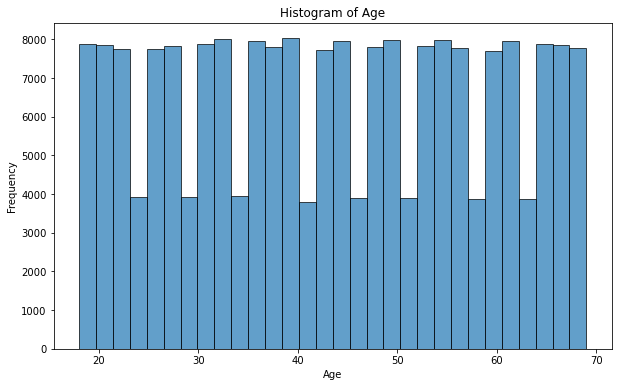

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

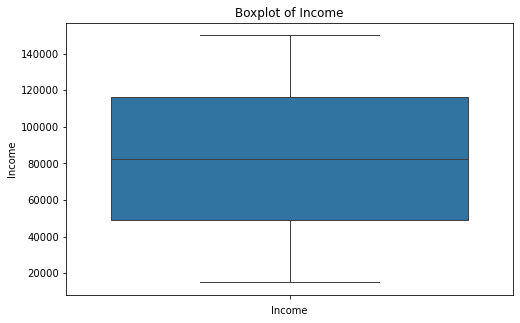

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(df['Income'])
plt.title('Boxplot of Income')
plt.xlabel('Income')
plt.show()

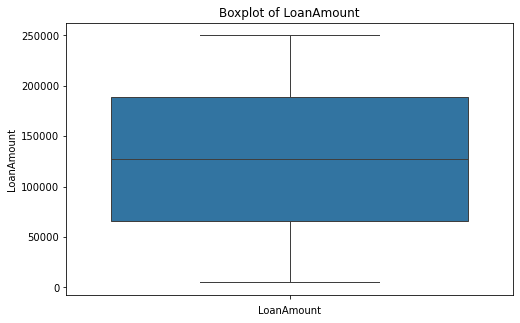

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(df['LoanAmount'])
plt.title('Boxplot of LoanAmount')
plt.xlabel('LoanAmount')
plt.show()
df.columns

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


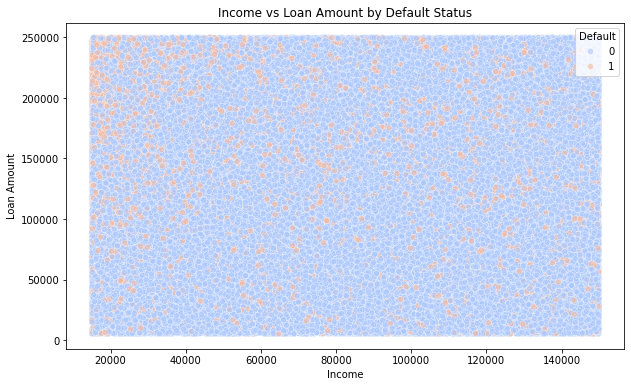

In [10]:
#scatterplots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='LoanAmount', hue='Default', data=df, palette='coolwarm', alpha=0.6)
plt.title('Income vs Loan Amount by Default Status')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.legend(title='Default')
plt.show()

/tmp/ipykernel_4762/4010798984.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Age', y='Default', data=df, jitter=True, alpha=0.4, palette='coolwarm')


<function matplotlib.pyplot.show(close=None, block=None)>

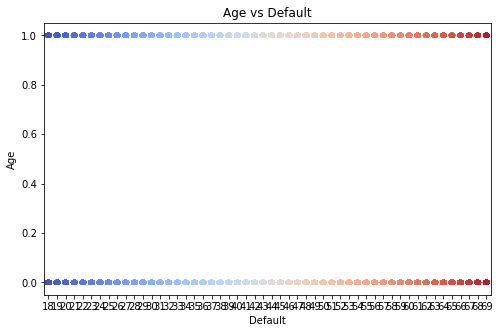

In [11]:
plt.figure(figsize=(8, 5))
sns.stripplot(x='Age', y='Default', data=df, jitter=True, alpha=0.4, palette='coolwarm')
plt.title('Age vs Default')
plt.xlabel('Default')
plt.ylabel('Age')
plt.show

In [12]:
#drop the id column 
df=df.drop(columns=['LoanID'])

In [13]:
#one hot encoding
# for col in df.select_dtypes(include=['object','category']).columns:
df=pd.get_dummies(df,columns=df.select_dtypes(include=['object','category']).columns,dtype=int)
df.shape

(204277, 32)

In [14]:
#train-test split
y=df['Default']
X=df.drop(columns=['Default'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)
train_data.to_csv("cleaned_data/train_data.csv", index=False)
test_data.to_csv("cleaned_data/test_data.csv", index=False)